In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import missingno as msno

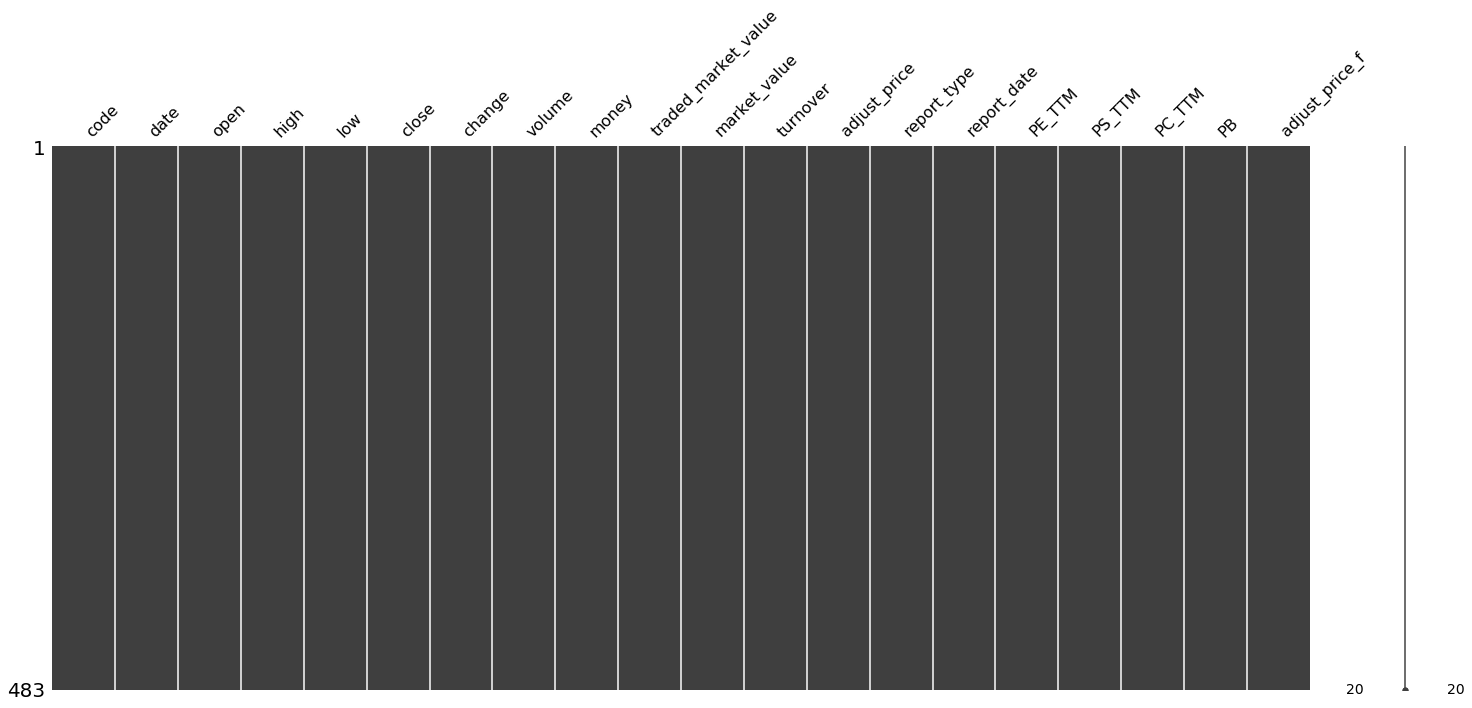

In [3]:
data = pd.read_csv(os.path.join(os.getcwd(), 'Datas', 'sh600621.csv'))
data.head()
msno.matrix(data)

In [492]:
data['date'] = pd.to_datetime(data.date)
data.insert(data.shape[1],'target',0)
data = data.sort_values(by='date',ascending=True)
data.reset_index(drop=True,inplace=True)
data.head()

,code,date,open,high,low,close,change,volume,money,traded_market_value,...,turnover,adjust_price,report_type,report_date,PE_TTM,PS_TTM,PC_TTM,PB,adjust_price_f,target
0,sh600621,2013-01-04,4.65,4.67,4.54,4.58,-0.015054,4576720.0,21089485.0,2.400297e+09,...,0.008733,1231.238333,2012-09-30,2012-10-26,18.926505,3.058694,-6.912395,1.791264,4.257541,0
1,sh600621,2013-01-07,4.56,4.61,4.55,4.58,0.000000,2553758.0,11685421.0,2.400297e+09,...,0.004873,1231.238333,2012-09-30,2012-10-26,18.926505,3.058694,-6.912395,1.791264,4.257541,0
2,sh600621,2013-01-08,4.59,4.66,4.55,4.63,0.010917,4316982.0,19941035.0,2.426501e+09,...,0.008237,1244.679762,2012-09-30,2012-10-26,19.133125,3.092085,-6.987858,1.810820,4.304021,0
3,sh600621,2013-01-09,4.61,4.66,4.57,4.62,-0.002160,3149920.0,14565091.0,2.421260e+09,...,0.006010,1241.991254,2012-09-30,2012-10-26,19.091798,3.085407,-6.972764,1.806908,4.294724,0
4,sh600621,2013-01-10,4.62,4.74,4.58,4.73,0.023810,5899989.0,27578333.0,2.478910e+09,...,0.011258,1271.563065,2012-09-30,2012-10-26,19.546373,3.158870,-7.138785,1.849931,4.396981,0


In [493]:
data.dtypes

code                           object
date                   datetime64[ns]
open                          float64
high                          float64
low                           float64
close                         float64
change                        float64
volume                        float64
money                         float64
traded_market_value           float64
market_value                  float64
turnover                      float64
adjust_price                  float64
report_type                    object
report_date                    object
PE_TTM                        float64
PS_TTM                        float64
PC_TTM                        float64
PB                            float64
adjust_price_f                float64
target                          int64
dtype: object

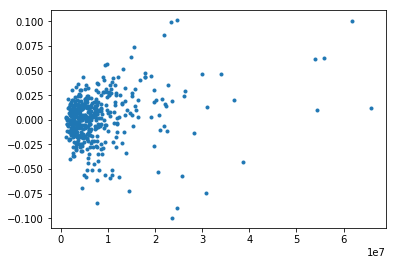

In [494]:
plt.plot(data.volume,data.change,marker='.',linestyle='none')

In [495]:
for i in range(data.shape[0]-1):
    if np.abs(data.loc[i+1,'change'])<=0.02:
        data.loc[i,'target'] = 0
    elif data.loc[i+1,'change']>0.02 and data.loc[i+1,'change']<=0.05:
        data.loc[i,'target'] = 1
    elif data.loc[i+1,'change']>0.05:
        data.loc[i,'target'] = 2
    elif data.loc[i+1,'change']<=(-0.02) and data.loc[i+1,'change']>=(-0.05):
        data.loc[i,'target'] = 3
    elif data.loc[i+1,'change']<(-0.05):
        data.loc[i,'target'] = 4
data.drop(data.shape[0]-1,0,inplace=True)


In [496]:
data.shape

(482, 21)

In [497]:
data.head()

,code,date,open,high,low,close,change,volume,money,traded_market_value,...,turnover,adjust_price,report_type,report_date,PE_TTM,PS_TTM,PC_TTM,PB,adjust_price_f,target
0,sh600621,2013-01-04,4.65,4.67,4.54,4.58,-0.015054,4576720.0,21089485.0,2.400297e+09,...,0.008733,1231.238333,2012-09-30,2012-10-26,18.926505,3.058694,-6.912395,1.791264,4.257541,0
1,sh600621,2013-01-07,4.56,4.61,4.55,4.58,0.000000,2553758.0,11685421.0,2.400297e+09,...,0.004873,1231.238333,2012-09-30,2012-10-26,18.926505,3.058694,-6.912395,1.791264,4.257541,0
2,sh600621,2013-01-08,4.59,4.66,4.55,4.63,0.010917,4316982.0,19941035.0,2.426501e+09,...,0.008237,1244.679762,2012-09-30,2012-10-26,19.133125,3.092085,-6.987858,1.810820,4.304021,0
3,sh600621,2013-01-09,4.61,4.66,4.57,4.62,-0.002160,3149920.0,14565091.0,2.421260e+09,...,0.006010,1241.991254,2012-09-30,2012-10-26,19.091798,3.085407,-6.972764,1.806908,4.294724,1
4,sh600621,2013-01-10,4.62,4.74,4.58,4.73,0.023810,5899989.0,27578333.0,2.478910e+09,...,0.011258,1271.563065,2012-09-30,2012-10-26,19.546373,3.158870,-7.138785,1.849931,4.396981,3


In [498]:
columns = ['open', 'high', 'low', 'close', 'change', 'volume',
       'money', 'traded_market_value', 'market_value', 'turnover',
       'adjust_price','PE_TTM', 'PS_TTM',
       'PC_TTM', 'PB', 'adjust_price_f']
feature = data.loc[:,columns]

squ_data = feature**2
squ_data.columns=['open2', 'high2', 'low2', 'close2', 'change2', 'volume2',
       'money2', 'traded_market_value2', 'market_value2', 'turnover2',
       'adjust_price2','PE_TTM2', 'PS_TTM2',
       'PC_TTM2', 'PB2', 'adjust_price_f2']
columns.extend(squ_data.columns)
feature=feature.join(squ_data)

# cube_data = feature**3
# cube_data.columns=['open3', 'high3', 'low3', 'close3', 'change3', 'volume3',
#        'money3', 'traded_market_value3', 'market_value3', 'turnover3',
#        'adjust_price3','PE_TTM3', 'PS_TTM3',
#        'PC_TTM3', 'PB3', 'adjust_price_f3']
# columns.extend(cube_data.columns)
# feature=feature.join(cube_data)
print(columns)
feature.head()

['open', 'high', 'low', 'close', 'change', 'volume', 'money', 'traded_market_value', 'market_value', 'turnover', 'adjust_price', 'PE_TTM', 'PS_TTM', 'PC_TTM', 'PB', 'adjust_price_f', 'open2', 'high2', 'low2', 'close2', 'change2', 'volume2', 'money2', 'traded_market_value2', 'market_value2', 'turnover2', 'adjust_price2', 'PE_TTM2', 'PS_TTM2', 'PC_TTM2', 'PB2', 'adjust_price_f2']


,open,high,low,close,change,volume,money,traded_market_value,market_value,turnover,...,money2,traded_market_value2,market_value2,turnover2,adjust_price2,PE_TTM2,PS_TTM2,PC_TTM2,PB2,adjust_price_f2
0,4.65,4.67,4.54,4.58,-0.015054,4576720.0,21089485.0,2.400297e+09,2.400297e+09,0.008733,...,4.447664e+14,5.761427e+18,5.761427e+18,0.000076,1.515948e+06,358.212592,9.355609,47.781205,3.208627,18.126655
1,4.56,4.61,4.55,4.58,0.000000,2553758.0,11685421.0,2.400297e+09,2.400297e+09,0.004873,...,1.365491e+14,5.761427e+18,5.761427e+18,0.000024,1.515948e+06,358.212592,9.355609,47.781205,3.208627,18.126655
2,4.59,4.66,4.55,4.63,0.010917,4316982.0,19941035.0,2.426501e+09,2.426501e+09,0.008237,...,3.976449e+14,5.887909e+18,5.887909e+18,0.000068,1.549228e+06,366.076472,9.560990,48.830159,3.279069,18.524597
3,4.61,4.66,4.57,4.62,-0.002160,3149920.0,14565091.0,2.421260e+09,2.421260e+09,0.006010,...,2.121419e+14,5.862502e+18,5.862502e+18,0.000036,1.542542e+06,364.496751,9.519736,48.619438,3.264917,18.444654
4,4.62,4.74,4.58,4.73,0.023810,5899989.0,27578333.0,2.478910e+09,2.478910e+09,0.011258,...,7.605645e+14,6.144992e+18,6.144992e+18,0.000127,1.616873e+06,382.060697,9.978460,50.962251,3.422245,19.333442


In [499]:
feature.shape

(482, 32)

In [500]:
target = data.target
target[0:5]

0    0
1    0
2    0
3    1
4    3
Name: target, dtype: int64

In [501]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(feature)
feature[columns]=std_scaler.transform(feature)

In [502]:
feature.head()

,open,high,low,close,change,volume,money,traded_market_value,market_value,turnover,...,money2,traded_market_value2,market_value2,turnover2,adjust_price2,PE_TTM2,PS_TTM2,PC_TTM2,PB2,adjust_price_f2
0,-1.236430,-1.287770,-1.288055,-1.321861,-0.677234,-0.376813,-0.471271,-1.321861,-1.321861,-0.376802,...,-0.262986,-1.251160,-1.251160,-0.255374,-1.264551,1.367218,0.019215,-0.466364,-0.743009,-1.264551
1,-1.332013,-1.349345,-1.277186,-1.321861,-0.063793,-0.633947,-0.640482,-1.321861,-1.321861,-0.633935,...,-0.279598,-1.251160,-1.251160,-0.293033,-1.264551,1.367218,0.019215,-0.466364,-0.743009,-1.264551
2,-1.300152,-1.298033,-1.277186,-1.268925,0.381068,-0.409828,-0.491935,-1.268925,-1.268925,-0.409843,...,-0.265526,-1.209673,-1.209673,-0.261409,-1.228347,1.439008,0.081215,-0.465770,-0.662188,-1.228347
3,-1.278912,-1.298033,-1.255450,-1.279512,-0.151812,-0.558170,-0.588667,-1.279512,-1.279512,-0.558194,...,-0.275524,-1.218006,-1.218006,-0.284160,-1.235620,1.424586,0.068761,-0.465889,-0.678426,-1.235620
4,-1.268291,-1.215933,-1.244581,-1.163053,0.906450,-0.208616,-0.354514,-1.163053,-1.163053,-0.208600,...,-0.245965,-1.125348,-1.125348,-0.219179,-1.154759,1.584929,0.207238,-0.464561,-0.497918,-1.154759


In [503]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split

In [517]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.1)
lr_cv = LogisticRegressionCV(Cs=[0.001,0.01,0.1,10,100],fit_intercept=True,cv=10,penalty='l2',
                             solver='lbfgs',class_weight='balanced',
                             multi_class='multinomial').fit(x_train,y_train)

In [520]:
y_proba=lr_cv.predict_proba(x_test)
ret = 0
num = 0
threshold = 0.5
for proba,y_h,y_t in zip(y_proba,y_hat,y_test):
    if proba.max() >= threshold:
        num += 1
        if y_h == y_t:
            ret += 1
            print(y_h)
print(lr_cv.score(x_test,y_test))
print('threshold:',threshold)
print('Predict Accuracy:',ret/num)

0
0.3673469387755102
threshold: 0.5
Predict Accuracy: 1.0


In [519]:
[x.max() for x in y_proba]

[0.33528750466395824,
 0.26180938146153454,
 0.27750527093675276,
 0.21712216931820796,
 0.2729025810036137,
 0.27900483170873,
 0.2704684532963267,
 0.30372717973980456,
 0.3685422572030097,
 0.29492404832836194,
 0.24290505059018633,
 0.2839827093004572,
 0.2826767403489763,
 0.3095412218807143,
 0.253878291741752,
 0.27364717690823437,
 0.28757533447734573,
 0.3017042403290171,
 0.25298022253328245,
 0.25657865523941,
 0.2857615792927969,
 0.23371138068744043,
 0.4902327899530172,
 0.27260549810541135,
 0.377741606239956,
 0.3044993066220216,
 0.28744816991602823,
 0.27714738520831167,
 0.2454666489430045,
 0.38010119691566385,
 0.28756791829731737,
 0.28993301327952803,
 0.33803715986143135,
 0.28942844262074285,
 0.2530296793391749,
 0.30075447826061036,
 0.7969037318618474,
 0.25271724342248986,
 0.27646542764864873,
 0.2853260634498597,
 0.317074770662842,
 0.2511373212400145,
 0.2846965541905619,
 0.27639717533128816,
 0.2961721000456384,
 0.2600244886015124,
 0.276718044632951